In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Module**

In [2]:
!pip install imutils

In [3]:
#!pip install imutils
import keras
import tensorflow
import os
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.utils import shuffle
from cv2 import imread
import numpy as np
import pandas as pd
import shutil
import time
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML

**Load Data**

In [4]:
data = []
labels = []
width,height=150,150

imagePaths = list(paths.list_images('/content/drive/MyDrive/gaussian_filtered_images'))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#labels = to_categorical(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(3662, 150, 150, 3)
(3662, 5)


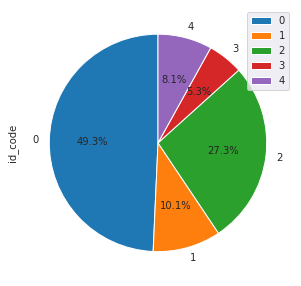

In [5]:
df=pd.read_csv("/content/drive/MyDrive/gaussian_filtered_images/train.csv")
dfg=df.groupby(['diagnosis']).count()
dfg.plot.pie(y="id_code",figsize=(5,5),autopct='%1.1f%%',startangle=90)
plt.show()

**Split the data for training and testing**

In [6]:
test_ratio = 0.20

# train is now 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_ratio)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2746, 150, 150, 3)
Test images: (916, 150, 150, 3)
Train label: (2746, 5)
Test label: (916, 5)


# CNN-ML Model
> *   CNN layers extracting the features and Pass 3D features to Flatten Layer.
> *   Flatten Layer Convert 3D features to 1D features.
> *   Pass those 1D features to Machine Learning Classifier.

In [21]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

cnn_model=Sequential()
cnn_model.add(Conv2D(16, (3, 3),activation='relu',input_shape=(150, 150, 3)))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(32, (3, 3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(64, (3, 3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(Flatten())   #Features Are Extracted From this Layer
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dense(5, activation='sigmoid'))

opt = Adam(learning_rate=INIT_LR)
cnn_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 64)      

# Training CNN

In [22]:
# train the head of the network
print("[INFO] training head..")
h = cnn_model.fit(x_train,y_train,epochs=EPOCHS,validation_split=0.1,verbose=1, batch_size=32)
print("Done !!")

[INFO] training head..
Epoch 1/20
78/78 [==============================] - 59s 739ms/step - loss: 0.3515 - accuracy: 0.6309 - val_loss: 0.9658 - val_accuracy: 0.5273
Epoch 2/20
78/78 [==============================] - 58s 745ms/step - loss: 0.2630 - accuracy: 0.7110 - val_loss: 0.4420 - val_accuracy: 0.5818
Epoch 3/20
78/78 [==============================] - 58s 745ms/step - loss: 0.2462 - accuracy: 0.7329 - val_loss: 0.2711 - val_accuracy: 0.7345
Epoch 4/20
78/78 [==============================] - 59s 753ms/step - loss: 0.2405 - accuracy: 0.7386 - val_loss: 0.6952 - val_accuracy: 0.5782
Epoch 5/20
78/78 [==============================] - 58s 747ms/step - loss: 0.2315 - accuracy: 0.7418 - val_loss: 0.3337 - val_accuracy: 0.7345
Epoch 6/20
78/78 [==============================] - 58s 746ms/step - loss: 0.2218 - accuracy: 0.7515 - val_loss: 0.4789 - val_accuracy: 0.4982
Epoch 7/20
78/78 [==============================] - 58s 746ms/step - loss: 0.2136 - accuracy: 0.7628 - val_loss: 0.3496

In [23]:
!pip install scikit-plot

[INFO] evaluating network...

Trainig Accuracy Score:- 76.18353969410052

Testing Accuracy Score:- 69.65065502183407

Traning Graph:- 
 


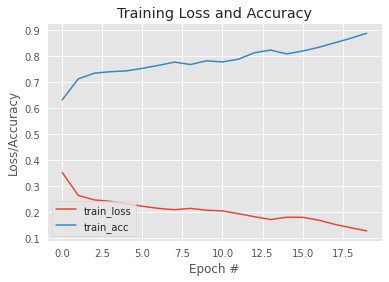

In [24]:
#!pip install scikit-plot
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics

print("[INFO] evaluating network...")
predIdxs = cnn_model.predict(x_test, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

trainpredIdxs = cnn_model.predict(x_train, batch_size=BS)
trainpredIdxs = np.argmax(trainpredIdxs, axis=1)

trainCNNScore=accuracy_score(trainpredIdxs,np.argmax(y_train,axis=1))*100
CNNScore=accuracy_score(predIdxs,np.argmax(y_test,axis=1))*100

print("\nTrainig Accuracy Score:-",trainCNNScore)
print("\nTesting Accuracy Score:-",CNNScore)
print("\nTraning Graph:- \n ")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left",)
plt.show()

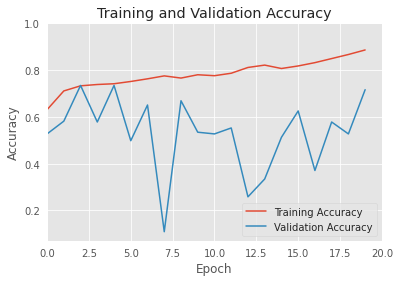

In [25]:
acc =  h.history["accuracy"]
val_acc = h.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,20])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

In [26]:
pred = cnn_model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06       100
           1       0.49      0.96      0.65       245
           2       0.93      0.92      0.92       433
           3       0.17      0.01      0.02        79
           4       0.00      0.00      0.00        59

    accuracy                           0.70       916
   macro avg       0.52      0.38      0.33       916
weighted avg       0.69      0.70      0.62       916



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test_new, pred)
cm

array([[  3,  82,  13,   2,   0],
       [  0, 235,  10,   0,   0],
       [  0,  34, 399,   0,   0],
       [  0,  72,   6,   1,   0],
       [  0,  53,   3,   3,   0]])

# Extracting Features

In [28]:
extractCNN = Model(cnn_model.inputs, cnn_model.layers[-4].output)

#del(data)
#del(labels)
feat_trainCNN  = extractCNN.predict(x_train)  
feat_testCNN = extractCNN.predict(x_test)      

print(feat_trainCNN.shape)

(2746, 1024)


# Training Machine Learning Classifier

**Support Vector Machine (SVM)**

In [29]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainSVMScoreCNN=svm.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("SVM Training Accuracy Score:-",TrainSVMScoreCNN)

TestSVMScoreCNN=svm.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nSVM Testing Accuracy Score:-",TestSVMScoreCNN)

y_pred = svm.predict(feat_testCNN)

cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print('\nConfusion Metrics \n',cm)

print(classification_report(np.argmax(y_test,axis=1),y_pred))

SVM Training Accuracy Score:- 81.86453022578296

SVM Testing Accuracy Score:- 72.81659388646288

Confusion Metrics 
 [[ 29  54  17   0   0]
 [ 18 210  17   0   0]
 [  5   2 426   0   0]
 [ 10  63   6   0   0]
 [  4  48   4   1   2]]
              precision    recall  f1-score   support

           0       0.44      0.29      0.35       100
           1       0.56      0.86      0.68       245
           2       0.91      0.98      0.94       433
           3       0.00      0.00      0.00        79
           4       1.00      0.03      0.07        59

    accuracy                           0.73       916
   macro avg       0.58      0.43      0.41       916
weighted avg       0.69      0.73      0.67       916



**Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'gini',random_state=0)
clf = clf.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainDecisionScoreCNN=clf.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("Decision Tree Training Accuracy Score:-",TrainDecisionScoreCNN)


TestDecisionScoreCNN=clf.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nDecision Tree Testing Accuracy Score:-",TestDecisionScoreCNN)
y_pred = clf.predict(feat_testCNN)

cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print('\nConfusion Metrics \n',cm)
print(classification_report(np.argmax(y_test,axis=1),y_pred))

Decision Tree Training Accuracy Score:- 99.2352512745812

Decision Tree Testing Accuracy Score:- 64.8471615720524

Confusion Metrics 
 [[ 40  34  12   9   5]
 [ 27 146  17  32  23]
 [  9  16 387  13   8]
 [ 12  38   6  15   8]
 [  8  29   6  10   6]]
              precision    recall  f1-score   support

           0       0.42      0.40      0.41       100
           1       0.56      0.60      0.57       245
           2       0.90      0.89      0.90       433
           3       0.19      0.19      0.19        79
           4       0.12      0.10      0.11        59

    accuracy                           0.65       916
   macro avg       0.44      0.44      0.44       916
weighted avg       0.65      0.65      0.65       916



**K-Nearest Neighbor(KNN)**

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric = 'euclidean')
knn.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainKNNScoreCNN=knn.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("KNN Training Accuracy Score:-",TrainKNNScoreCNN)

TestKNNScoreCNN=knn.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nKNN Testing Accuracy Score:-",TestKNNScoreCNN)

y_pred = knn.predict(feat_testCNN)

cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print('\nConfusion Metrics \n',cm)
print(classification_report(np.argmax(y_test,axis=1),y_pred))

KNN Training Accuracy Score:- 83.94027676620539

KNN Testing Accuracy Score:- 71.06986899563319

Confusion Metrics 
 [[ 42  36  16   4   2]
 [ 39 180  14   8   4]
 [  4  10 418   0   1]
 [ 18  47   8   5   1]
 [ 10  35   6   2   6]]
              precision    recall  f1-score   support

           0       0.37      0.42      0.39       100
           1       0.58      0.73      0.65       245
           2       0.90      0.97      0.93       433
           3       0.26      0.06      0.10        79
           4       0.43      0.10      0.16        59

    accuracy                           0.71       916
   macro avg       0.51      0.46      0.45       916
weighted avg       0.67      0.71      0.68       916



**Random Forset**

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(feat_trainCNN,np.argmax(y_train,axis=1))
TrainRFScoreCNN=classifier.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("random forest Training Accuracy Score:-",TrainRFScoreCNN)

TestRFScoreCNN=classifier.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nrandom forestTesting Accuracy Score:-",TestRFScoreCNN)

y_pred = classifier.predict(feat_testCNN)

cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print('\nConfusion Metrics \n',cm)
print(classification_report(np.argmax(y_test,axis=1),y_pred))

random forest Training Accuracy Score:- 98.2884195193008

random forestTesting Accuracy Score:- 70.96069868995633

Confusion Metrics 
 [[ 34  41  20   4   1]
 [ 22 194  18   5   6]
 [  4  12 414   1   2]
 [ 16  47   9   4   3]
 [  7  37   6   5   4]]
              precision    recall  f1-score   support

           0       0.41      0.34      0.37       100
           1       0.59      0.79      0.67       245
           2       0.89      0.96      0.92       433
           3       0.21      0.05      0.08        79
           4       0.25      0.07      0.11        59

    accuracy                           0.71       916
   macro avg       0.47      0.44      0.43       916
weighted avg       0.65      0.71      0.67       916



# Summary

> CNN-svm model shows highest accuarcy followed closely by CNN-knn and CNN.

In [33]:
print("--Training Accuracy..")
print("CNN Accuracy:- {:.2f} %".format(trainCNNScore))
print("CNN-SVM Accuracy:- {:.2f} %".format(TrainSVMScoreCNN))
print("CNN-DT Accuracy:- {:.2f} %".format(TrainDecisionScoreCNN))
print("CNN-KNN Accuracy:- {:.2f} %".format(TrainKNNScoreCNN))
print("CNN-RF Accuracy:- {:.2f} %".format(TrainRFScoreCNN))

print("\n--Testing Accuracy..")
print("CNN Accuracy:- {:.2f} %".format(CNNScore))
print("CNN-SVM Accuracy:- {:.2f} %".format(TestSVMScoreCNN))
print("CNN-DT Accuracy:- {:.2f} %".format(TestDecisionScoreCNN))
print("CNN-KNN Accuracy:- {:.2f} %".format(TestKNNScoreCNN))
print("CNN-RF Accuracy:- {:.2f} %".format(TestRFScoreCNN))


--Training Accuracy..
CNN Accuracy:- 76.18 %
CNN-SVM Accuracy:- 81.86 %
CNN-DT Accuracy:- 99.24 %
CNN-KNN Accuracy:- 83.94 %
CNN-RF Accuracy:- 98.29 %

--Testing Accuracy..
CNN Accuracy:- 69.65 %
CNN-SVM Accuracy:- 72.82 %
CNN-DT Accuracy:- 64.85 %
CNN-KNN Accuracy:- 71.07 %
CNN-RF Accuracy:- 70.96 %
